# Introduction

We are working for an e-learning company that offers courses on programming, and we want to find the two best markets to advertise our product in.

data can be downloaded here: https://github.com/freeCodeCamp/2017-new-coder-survey

In [1]:
import pandas as pd

In [2]:
new_coders = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=0)

In [3]:
new_coders.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
new_coders['JobRoleInterest'].value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                                               0.117706
  Front-End Web Developer                                                                                                                                              0.064359
  Data Scientist                                                                                                                                                       0.021739
Back-End Web Developer                                                                                                                                                 0.020309
  Mobile Developer                                                                                                                                                     0.016733
Game Developer                                                                                                          

While the data seems very disorganized, it seems like a lot of people are interested in web and mobile development.

In [5]:
# split each interest by ','
interest_count = new_coders['JobRoleInterest'].dropna().str.split(',')
interest_count.apply(lambda x: len(x)).value_counts(normalize=True)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

In [6]:
web_mobile = new_coders['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer')
web_mobile_freq = web_mobile.value_counts(normalize=True)*100

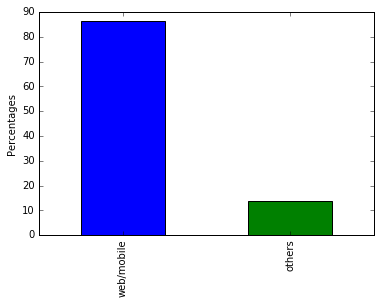

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

web_mobile_freq.plot.bar()
plt.ylabel("Percentages")
plt.xticks([0,1],['web/mobile','others'])
plt.show()

We can verify that most coders are interested in web/mobile development.

## New Coders

In [8]:
new_coders['JobRoleInterest'].dropna(inplace=True)

In [9]:
new_coders['CountryLive'].value_counts().head()

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Name: CountryLive, dtype: int64

We see that most of the new coders live in the USA, and the next two biggest countries for new coders are India and the UK.

In [10]:
# percentage
(new_coders['CountryLive'].value_counts(normalize=True)*100).head()

United States of America    37.760824
India                        9.128847
United Kingdom               4.936098
Canada                       4.016693
Brazil                       2.373500
Name: CountryLive, dtype: float64

## Spending money on Learning

In [11]:
# avoiding division by 0
new_coders['MonthsProgramming'].replace(0,1,inplace=True)

In [12]:
# how much each coder spends on average every month
new_coders['spent_per_month'] = new_coders['MoneyForLearning']/new_coders['MonthsProgramming']

In [13]:
new_coders = new_coders[new_coders['spent_per_month'].notnull()]

In [14]:
new_coders = new_coders[new_coders['CountryLive'].notnull()]

In [15]:
country_mean = new_coders.groupby('CountryLive').mean()
country_mean['spent_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    206.297711
India                        66.526198
United Kingdom               55.774980
Canada                      118.434054
Name: spent_per_month, dtype: float64

Excluding the USA, we see that on average, Canadian coders spend the most on learning.

In [16]:
country_4 = new_coders[new_coders['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
country_4['spent_per_month'].describe()

count     7968.000000
mean       165.319915
std       1513.821754
min          0.000000
25%          0.000000
50%          2.020408
75%         33.333333
max      80000.000000
Name: spent_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



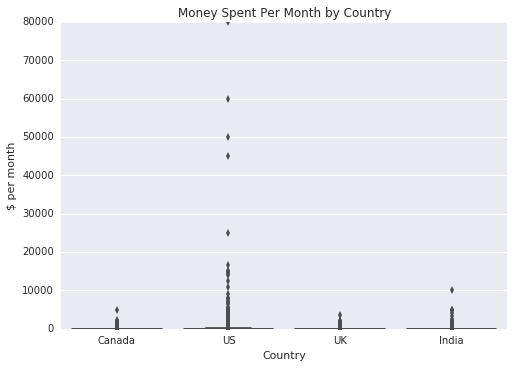

In [17]:
import seaborn as sns

sns.boxplot(x='CountryLive',y='spent_per_month',data=country_4)
plt.xticks(range(4),['Canada','US','UK','India'])
plt.title('Money Spent Per Month by Country')
plt.xlabel('Country')
plt.ylabel('$ per month')
plt.show()

After visualizing the distribution of money spent using a boxplot, we see that there are many outliers for each country.

In [18]:
country_4 = country_4[country_4['spent_per_month']<20000]

In [19]:
country_4_mean = country_4.groupby('CountryLive').mean()
country_4_mean['spent_per_month']

CountryLive
Canada                      118.434054
India                        66.526198
United Kingdom               55.774980
United States of America    158.919644
Name: spent_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



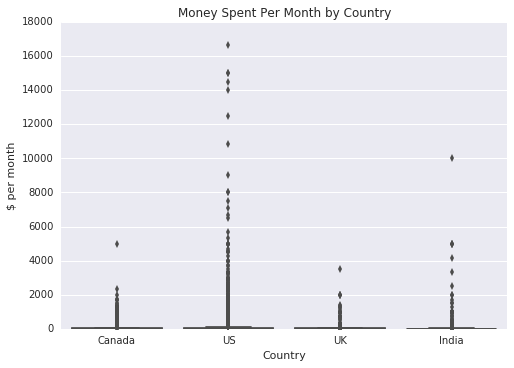

In [20]:
sns.boxplot(x='CountryLive',y='spent_per_month',data=country_4)
plt.xticks(range(4),['Canada','US','UK','India'])
plt.title('Money Spent Per Month by Country')
plt.xlabel('Country')
plt.ylabel('$ per month')
plt.show()

In [21]:
# For first country we select USA
country_3 = country_4[country_4['CountryLive'].str.contains('India|United Kingdom|Canada')]
country_3 = country_3[country_3['spent_per_month']<6000]
country_3_mean = country_3.groupby('CountryLive').mean()
country_3_mean['spent_per_month']
#we see that India's mean came down significantly

CountryLive
Canada            118.434054
India              58.384006
United Kingdom     55.774980
Name: spent_per_month, dtype: float64

In [22]:
country_3['CountryLive'].value_counts()

India             1220
United Kingdom     698
Canada             578
Name: CountryLive, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



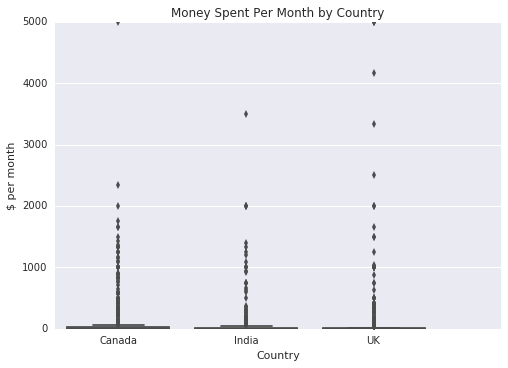

In [23]:
sns.boxplot(x='CountryLive',y='spent_per_month',data=country_3)
plt.xticks(range(4),['Canada','India','UK'])
plt.title('Money Spent Per Month by Country')
plt.xlabel('Country')
plt.ylabel('$ per month')
plt.show()

## Potential Customers

In [24]:
#potential customers for $59/month subscription
less_than_100 = country_3[country_3['spent_per_month']<100]

In [25]:
less_than_100_mean = less_than_100.groupby('CountryLive').mean()
less_than_100_mean['spent_per_month']

CountryLive
Canada             8.764812
India              6.296649
United Kingdom    10.295414
Name: spent_per_month, dtype: float64

Surprisingly, UK beat out Canada and India for customers who spent less than $100 a month

In [26]:
less_than_100['CountryLive'].value_counts()

India             1119
United Kingdom     636
Canada             486
Name: CountryLive, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



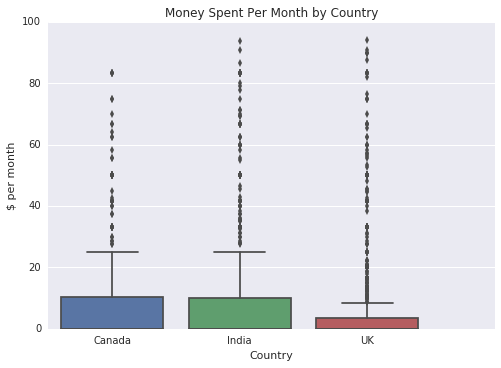

In [27]:
sns.boxplot(x='CountryLive',y='spent_per_month',data=less_than_100)
plt.xticks(range(4),['Canada','India','UK'])
plt.title('Money Spent Per Month by Country')
plt.xlabel('Country')
plt.ylabel('$ per month')
plt.show()

It is clear that we should definitely advertise in the USA as it is clearly the best choice out of the four countries. The second choice is split between Canada and India where they each have different advantages.
* Canada: people willing to pay more per month
* India: More people wanting to learn programming